In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the CSV file
file_path = '/home/luca/raspicar/log_pure_polyfit.csv'
data_pure_poly = pd.read_csv(file_path)
# Convert timestamps to a datetime format for better handling in plots
data_pure_poly['system_timestamp'] = pd.to_datetime(data_pure_poly['system_timestamp'], unit='ms')
data_pure_poly['seconds_from_start'] = (data_pure_poly['system_timestamp'] - data_pure_poly['system_timestamp'].iloc[0]).dt.total_seconds()


# Load the CSV file
file_path = '/home/luca/raspicar/log_pure_pilotnet.csv'
data_pure_pilotnet = pd.read_csv(file_path)
# Convert timestamps to a datetime format for better handling in plots
data_pure_pilotnet['system_timestamp'] = pd.to_datetime(data_pure_pilotnet['system_timestamp'], unit='ms')
data_pure_pilotnet['seconds_from_start'] = (data_pure_pilotnet['system_timestamp'] - data_pure_pilotnet['system_timestamp'].iloc[0]).dt.total_seconds()


# Load the CSV file
file_path = '/home/luca/raspicar/log_both.csv'
data_both = pd.read_csv(file_path)
# Convert timestamps to a datetime format for better handling in plots
data_both['system_timestamp'] = pd.to_datetime(data_both['system_timestamp'], unit='ms')
data_both['seconds_from_start'] = (data_both['system_timestamp'] - data_both['system_timestamp'].iloc[0]).dt.total_seconds()


# Display the first few rows of the dataframe to understand its structure
#print(data.head())


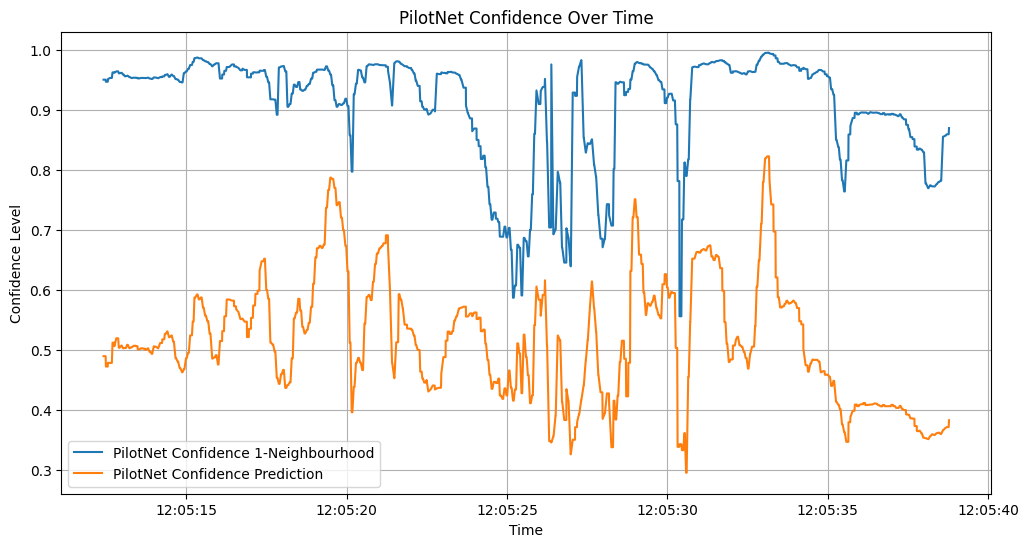

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(data_pure_pilotnet['system_timestamp'], data_pure_pilotnet['neighborhood_prob'], label='PilotNet Confidence 1-Neighbourhood')
plt.plot(data_pure_pilotnet['system_timestamp'], data_pure_pilotnet['max_prob'], label='PilotNet Confidence Prediction')
plt.xlabel('Time')
plt.ylabel('Confidence Level')
plt.title('PilotNet Confidence Over Time')
plt.legend()
plt.grid(True)
plt.show()


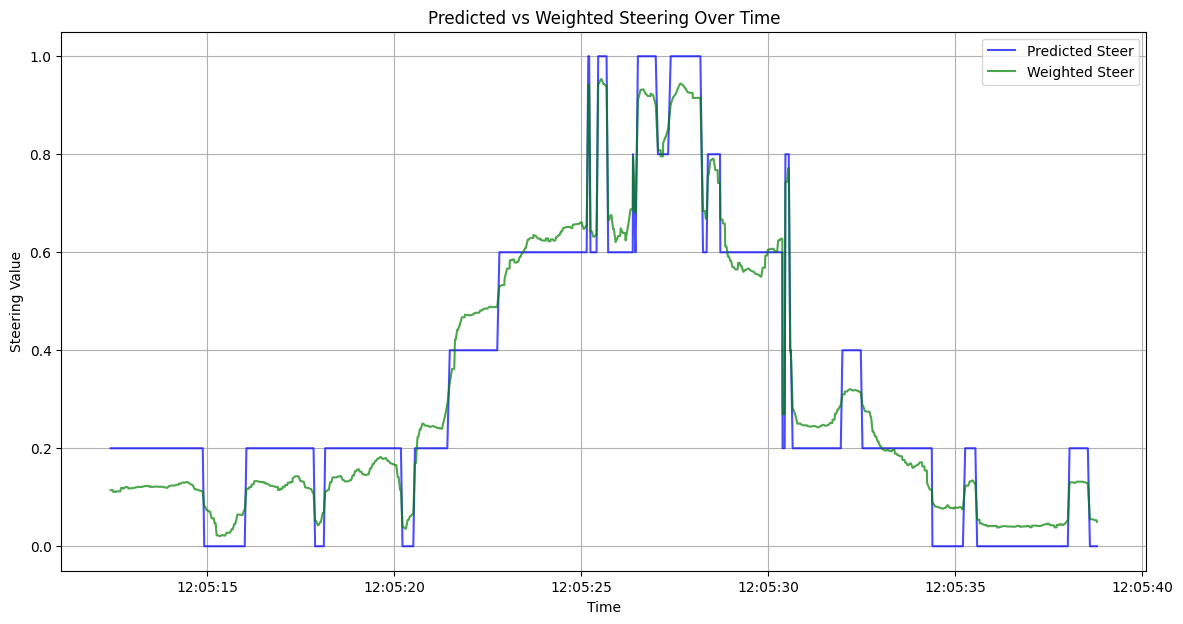

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(data_pure_pilotnet['system_timestamp'], data_pure_pilotnet['predicted_steer'], label='Predicted Steer', color='blue', alpha=0.7)
plt.plot(data_pure_pilotnet['system_timestamp'], data_pure_pilotnet['weighted_steer'], label='Weighted Steer', color='green', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Steering Value')
plt.title('Predicted vs Weighted Steering Over Time')
plt.legend()
plt.grid(True)
plt.show()

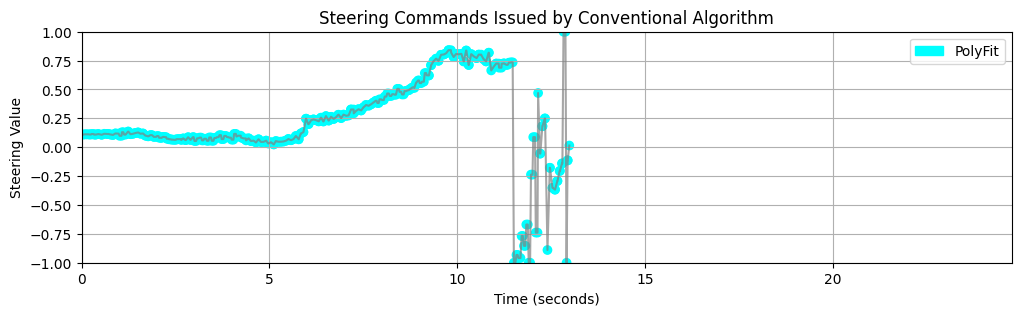

In [75]:

# Filter the data to include only entries from 5 to 18 seconds
mask = (data_pure_poly['seconds_from_start'] > 5) & (data_pure_poly['seconds_from_start'] <= 18)
data_filtered = data_pure_poly.loc[mask].copy()

# Adjust the seconds to start from zero at the 5-second mark for filtered data
data_filtered.loc[:, 'adjusted_seconds'] = data_filtered['seconds_from_start'] - 5

# Define the colors for each algorithm
color_map = {
    'PolyFit': 'cyan',  # Assign cyan to PolyFit
}

# Apply the color map to the filtered data
colors = data_filtered['algorithm_used'].map(color_map)

# Set up the plot
plt.figure(figsize=(12, 3))
plt.plot(data_filtered['adjusted_seconds'], data_filtered['steer_executed'], label='Steer Command', color='grey', alpha=0.7)
plt.scatter(data_filtered['adjusted_seconds'], data_filtered['steer_executed'], color=colors, label='Algorithm Control')

# Set x-axis limits from 0 to the maximum of the original data minus 5 seconds
plt.xlim([0, data_pure_poly['seconds_from_start'].max() - 5])
plt.ylim(-1, 1)
plt.xlabel('Time (seconds)')
plt.ylabel('Steering Value')
plt.title('Steering Commands Issued by Conventional Algorithm')
plt.grid(True)

# Create legend patches for each algorithm
patches = [mpatches.Patch(color=color, label=algo) for algo, color in color_map.items()]
plt.legend(handles=patches)
plt.savefig("steering_conventional.png")
plt.show()


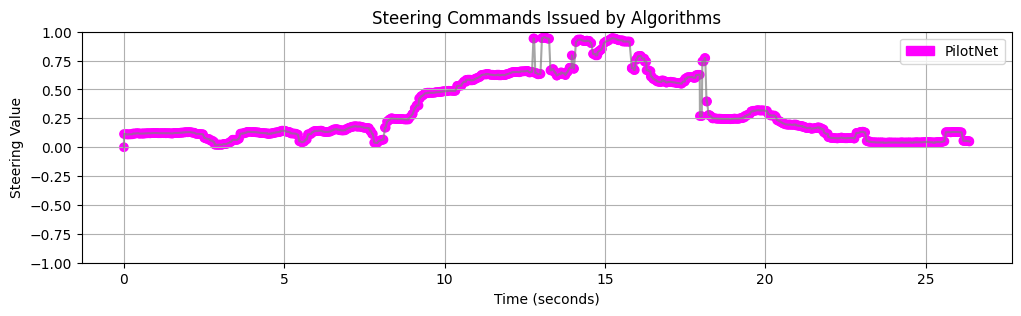

In [73]:
# Map each algorithm to a specific color
color_map = {
    'PilotNet': 'magenta'  # Assign blue to PilotNet
    #'PolyFit': 'cyan',  # Assign green to PolyFit
    #'MANUAL': 'red'      # Assign red to manual interventions if included
}

# Apply the map to create a list of colors for each point
colors = data_pure_pilotnet['algorithm_used'].map(color_map)

# Plotting
plt.figure(figsize=(12, 3))
plt.plot(data_pure_pilotnet['seconds_from_start'], data_pure_pilotnet['steer_executed'], label='Steer Command', color='grey', alpha=0.7)
plt.scatter(data_pure_pilotnet['seconds_from_start'], data_pure_pilotnet['steer_executed'], color=colors, label='Algorithm Control')
plt.xlabel('Time (seconds)')
plt.ylabel('Steering Value')
plt.ylim(-1, 1)
plt.title('Steering Commands Issued by Algorithms')
# Create a patch (proxy artist) for each algorithm
patches = [mpatches.Patch(color=color, label=algo) for algo, color in color_map.items()]

# Add these patches to the legend
plt.legend(handles=patches)
plt.grid(True)
plt.savefig("steering_pilotnet.png")
plt.show()


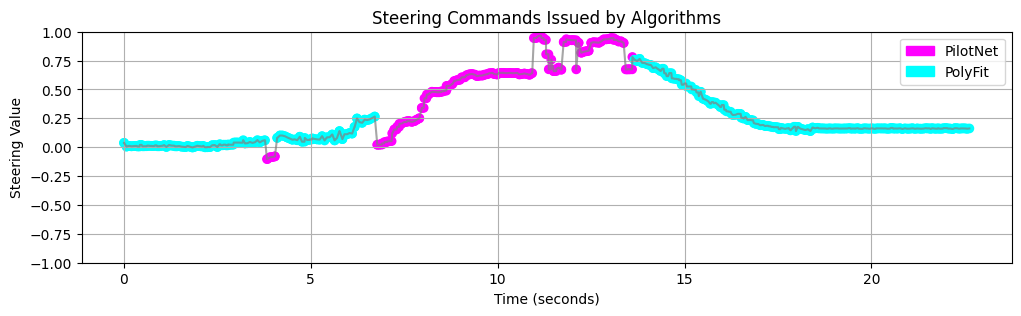

In [74]:
# Map each algorithm to a specific color
color_map = {
    'PilotNet': 'magenta',  # Assign blue to PilotNet
    'PolyFit': 'cyan',  # Assign green to PolyFit
    #'MANUAL': 'red'      # Assign red to manual interventions if included
}

# Apply the map to create a list of colors for each point
colors = data_both['algorithm_used'].map(color_map)

# Plotting
plt.figure(figsize=(12,3))
plt.plot(data_both['seconds_from_start'], data_both['steer_executed'], label='Steer Command', color='grey', alpha=0.7)
plt.scatter(data_both['seconds_from_start'], data_both['steer_executed'], color=colors, label='Algorithm Control')
plt.xlabel('Time (seconds)')
plt.ylabel('Steering Value')
plt.ylim(-1, 1)
plt.title('Steering Commands Issued by Algorithms')
# Create a patch (proxy artist) for each algorithm
patches = [mpatches.Patch(color=color, label=algo) for algo, color in color_map.items()]

# Add these patches to the legend
plt.legend(handles=patches)
plt.grid(True)
plt.savefig("steering_both.png")
plt.show()

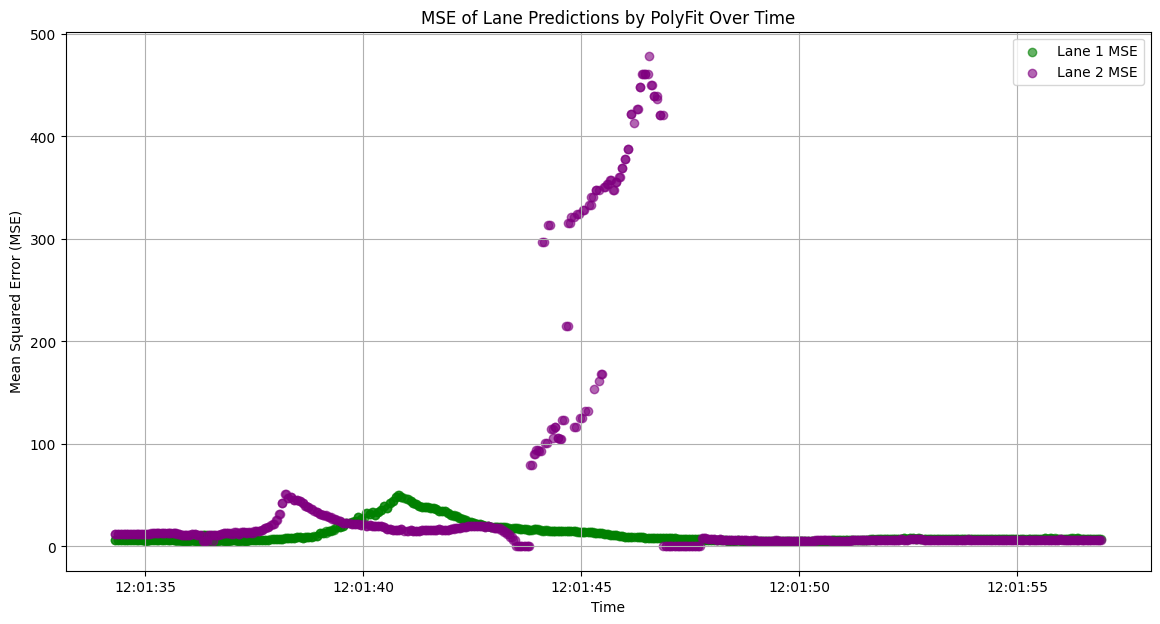

In [26]:
import matplotlib.pyplot as plt

# Assume data filtering by algorithm is already done and data is prepared
#mask_polyfit = data['algorithm_used'] == 'PolyFit'

plt.figure(figsize=(14, 7))

# Plot MSE for Lane 1
plt.scatter(data_both['system_timestamp'], data_both['lane1_mse'], color='green', label='Lane 1 MSE', alpha=0.6)

# Plot MSE for Lane 2
plt.scatter(data_both['system_timestamp'], data_both['lane2_mse']], color='purple', label='Lane 2 MSE', alpha=0.6)

plt.xlabel('Time')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE of Lane Predictions by PolyFit Over Time')
plt.legend()
plt.grid(True)
plt.show()


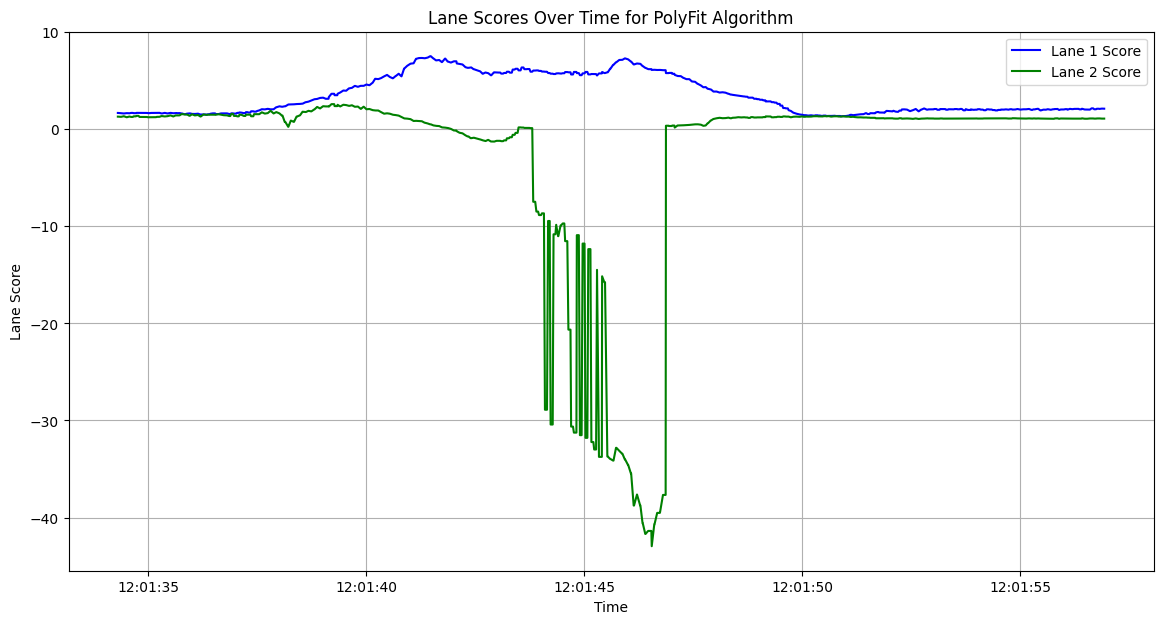

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(data_both['system_timestamp'], data_both['lane1_score'], label='Lane 1 Score', color='blue')
plt.plot(data_both['system_timestamp'], data_both['lane2_score'], label='Lane 2 Score', color='green')
plt.xlabel('Time')
plt.ylabel('Lane Score')
plt.title('Lane Scores Over Time for PolyFit Algorithm')
plt.legend()
plt.grid(True)
plt.show()


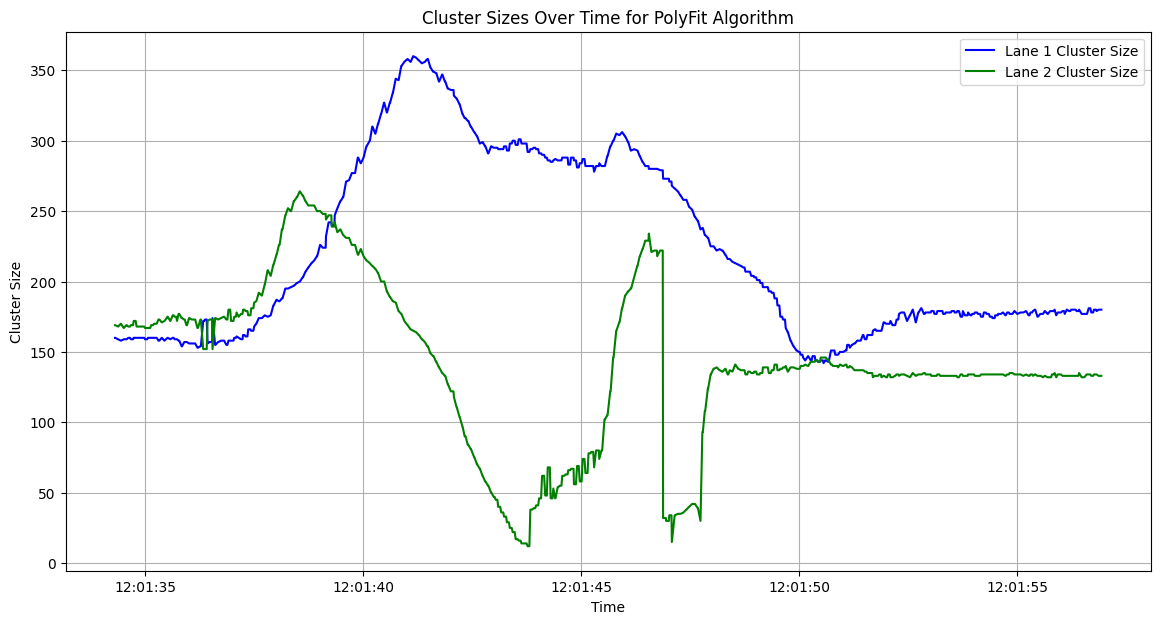

In [28]:
plt.figure(figsize=(14, 7))
plt.plot(data_both['system_timestamp'], data_both['lane1_cluster_size'], label='Lane 1 Cluster Size', color='blue')
plt.plot(data_both['system_timestamp'], data_both['lane2_cluster_size'], label='Lane 2 Cluster Size', color='green')
plt.xlabel('Time')
plt.ylabel('Cluster Size')
plt.title('Cluster Sizes Over Time for PolyFit Algorithm')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Load the log file
file_path = '/home/luca/raspicar/log.csv'
data = pd.read_csv(file_path)

# Ensure the necessary columns are numeric and non-null
data['lane1_mse'] = pd.to_numeric(data['lane1_mse'], errors='coerce')
data['lane2_mse'] = pd.to_numeric(data['lane2_mse'], errors='coerce')
data['lane1_cluster_size'] = pd.to_numeric(data['lane1_cluster_size'], errors='coerce')
data['lane2_cluster_size'] = pd.to_numeric(data['lane2_cluster_size'], errors='coerce')

# Constants for the score calculation
epsilon = 1e-6
alpha = 0.1 # Reduced impact of MSE in the score
beta = 2.0  # Increased impact of size in the score
gamma = 2.0  # Exponential factor for size scoring
size_threshold = 150  # You might need to adjust this based on expected cluster sizes

# Define a function to calculate the score based on provided parameters
#    return alpha / (mse + epsilon) + beta * ((size / size_threshold) ** gamma)
def calculate_score(mse, size):
    return alpha * -mse + beta * ((size / size_threshold) ** gamma)

# Apply the score calculation to each lane
data['lane1_score_calculated'] = data.apply(lambda row: calculate_score(row['lane1_mse'], row['lane1_cluster_size']), axis=1)
data['lane2_score_calculated'] = data.apply(lambda row: calculate_score(row['lane2_mse'], row['lane2_cluster_size']), axis=1)


In [ ]:
import matplotlib.pyplot as plt

# Plotting the calculated scores over time
plt.figure(figsize=(14, 7))
plt.plot(data['system_timestamp'], data['lane1_score_calculated'], label='Calculated Lane 1 Score', color='blue')
plt.plot(data['system_timestamp'], data['lane2_score_calculated'], label='Calculated Lane 2 Score', color='green')
plt.xlabel('Time')
plt.ylabel('Score')
plt.title('Calculated Lane Scores Over Time')
plt.legend()
plt.grid(True)
plt.show()
